In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
import numpy as np

In [2]:
da = pd.read_csv("nhanes_2015_2016.csv")
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


## Frequency table and Dealing with missing values

In [4]:
# Frequency table 
da.DMDEDUC2.value_counts()

4.0    1621
5.0    1366
3.0    1186
1.0     655
2.0     643
9.0       3
Name: DMDEDUC2, dtype: int64

In [10]:
print(da.DMDEDUC2.value_counts().sum())
print(da.shape[0])

5474
5735


Note that `value_counts` method exclude missing values.

In [11]:
# missing value
pd.isnull(da.DMDEDUC2).sum()

261

In [13]:
# it is useful to 'replace' integer codes with a text label that reflect the code's meaning 
da['DMDEDUC2x'] = da.DMDEDUC2.replace({1: '<9', 3: 'HS/GED', 4: 'Some college/AA', 5 : 'college',
                                      7: 'Refused', 9: 'Dont know'})
da.DMDEDUC2x.value_counts()

Some college/AA    1621
college            1366
HS/GED             1186
<9                  655
2.0                 643
Dont know             3
Name: DMDEDUC2x, dtype: int64

In [16]:
# transfer it to proportion
x = da.DMDEDUC2x.value_counts()
x / x.sum()

Some college/AA    0.296127
college            0.249543
HS/GED             0.216661
<9                 0.119657
2.0                0.117464
Dont know          0.000548
Name: DMDEDUC2x, dtype: float64

In [29]:
# Treat the missing response
da['DMDEUC2x'] = da.DMDEDUC2x.fillna('missing')
da.DMDEUC2x.value_counts()

Some college/AA    1621
college            1366
HS/GED             1186
<9                  655
2.0                 643
missing             261
Dont know             3
Name: DMDEUC2x, dtype: int64

## Graphical summaries

Text(0.5, 0, 'Body weight')

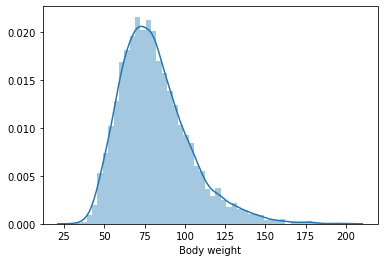

In [31]:
# Quantitative variables can be effectively summarized graphically. 
sns.distplot(da.BMXWT.dropna()).set_xlabel('Body weight')

Text(0.5, 0, 'Systolic blood pressure measurement ')

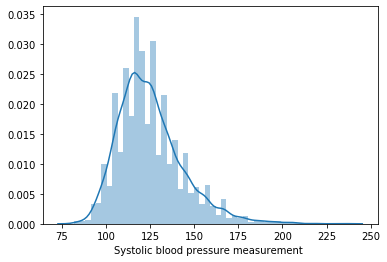

In [28]:
sns.distplot(da.BPXSY1.dropna()).set_xlabel('Systolic blood pressure measurement ')

## Compare several distribution,using side-by-side boxplots

Text(0, 0.5, '"Blood pressure in mm/Hg"')

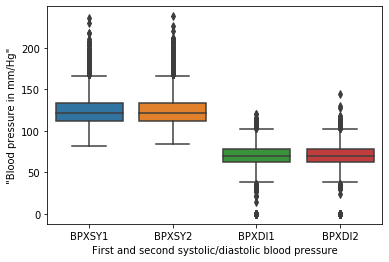

In [30]:
bp = sns.boxplot(data = da.loc[:,["BPXSY1", "BPXSY2", "BPXDI1", "BPXDI2"]])
bp.set_xlabel('First and second systolic/diastolic blood pressure')
bp.set_ylabel('"Blood pressure in mm/Hg"')

## Stratification 

Text(0, 0.5, 'First systolic blood pressure')

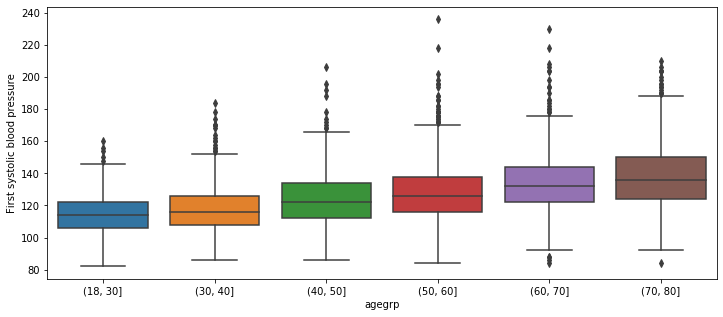

In [38]:
da['agegrp'] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])

plt.figure(figsize = (12,5))
sns.boxplot(x = 'agegrp', y = 'BPXSY1', data = da).set_ylabel('First systolic blood pressure')

Note that it makes boxplot of BPXY1(first Systolic blood pressure measurement) stratified by age group

Text(0, 0.5, 'First systolic blood pressure')

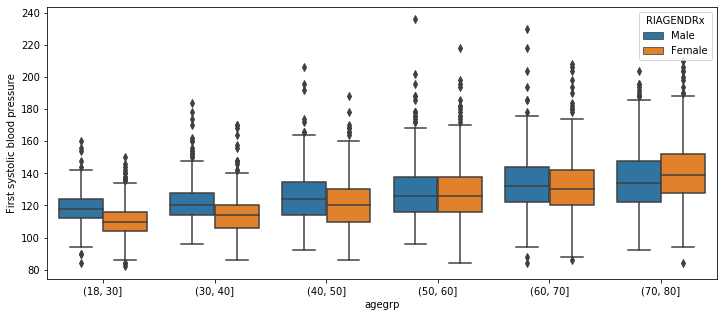

In [40]:
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})
plt.figure(figsize = (12,5))
sns.boxplot(x = 'agegrp', y = 'BPXSY1', hue="RIAGENDRx", data = da).set_ylabel('First systolic blood pressure') #hue: order to plot the categorical levels

Interpretation: We see from the figure above that within each gender, older people tend ot have higher blood pressure than younger people.However, within an age band, the relationship between gender and systolic blood pressure is somewhat complex -- in yougner people, men have substantially higher blood pressures than women of the same age. However, for people older than 50, this relationship becomes much weaker, and among people older than 70 it appears to reverse. It is also notable that the variation of these distributions,reflected in the height of each box in the boxplot, increases with age

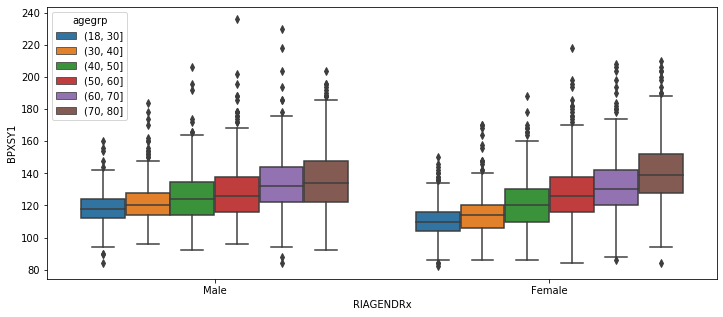

In [43]:
# when sstratifying on two factors(age and gender), we can group the boxes first by age, and within age bands by gender as above
# DO opposite, group first by gender, and then within gender group by age bands
plt.figure(figsize = (12,5))
sns.boxplot(x="RIAGENDRx", y="BPXSY1", hue="agegrp", data=da)

In [45]:
da.groupby('agegrp')['DMDEDUC2x'].value_counts()

agegrp    DMDEDUC2x      
(18, 30]  Some college/AA    364
          college            278
          HS/GED             237
          2.0                 99
          <9                  47
(30, 40]  Some college/AA    282
          college            264
          HS/GED             182
          2.0                111
          <9                  93
(40, 50]  Some college/AA    262
          college            260
          HS/GED             171
          2.0                112
          <9                  98
(50, 60]  Some college/AA    258
          HS/GED             220
          college            220
          2.0                122
          <9                 104
(60, 70]  Some college/AA    238
          HS/GED             192
          college            188
          <9                 149
          2.0                111
(70, 80]  Some college/AA    217
          HS/GED             184
          <9                 164
          college            156
          2.0    

Interpretation: yougner people as a group have higher educational attainment than older people as a group. As these young pepople grou older, the cross sectional relationship between age and educational attainment will change.

In [60]:
dx = da.loc[~da.DMDEDUC2x.isin(['Dont know','missing']),:]
dx = dx.groupby(["agegrp", "RIAGENDRx"])["DMDEDUC2x"]
dx = dx.value_counts()
dx = dx.unstack()
dx = dx.apply(lambda x: x / x.sum(), axis = 1)
print(dx.to_string(float_format = '%.3f'))

DMDEDUC2x            2.0    <9  HS/GED  Some college/AA  college
agegrp   RIAGENDRx                                              
(18, 30] Female    0.080 0.049   0.215            0.374    0.282
         Male      0.117 0.042   0.250            0.333    0.258
(30, 40] Female    0.089 0.097   0.165            0.335    0.314
         Male      0.151 0.103   0.227            0.269    0.251
(40, 50] Female    0.110 0.106   0.173            0.313    0.299
         Male      0.142 0.112   0.209            0.262    0.274
(50, 60] Female    0.117 0.102   0.234            0.302    0.245
         Male      0.148 0.123   0.242            0.256    0.231
(60, 70] Female    0.118 0.188   0.206            0.293    0.195
         Male      0.135 0.151   0.231            0.249    0.233
(70, 80] Female    0.105 0.225   0.240            0.281    0.149
         Male      0.113 0.180   0.215            0.255    0.237


Note: Pivot the education level into columns, and normalize the coutns so that they sum to 1.
one notable observation from this table is that for people up to age around 60, women are more liekly to have graduated from college than men, but for people over aged 60, this relationship reverses